In [7]:
!pip install scikit-learn

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
from sklearn.cluster import KMeans

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [61]:
dataset = pd.read_csv('drive/My Drive/mall.csv')
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [62]:
x = dataset.iloc[:,[3,4]].values
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [74]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++',max_iter = 300 , n_init = 10 , random_state = 0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

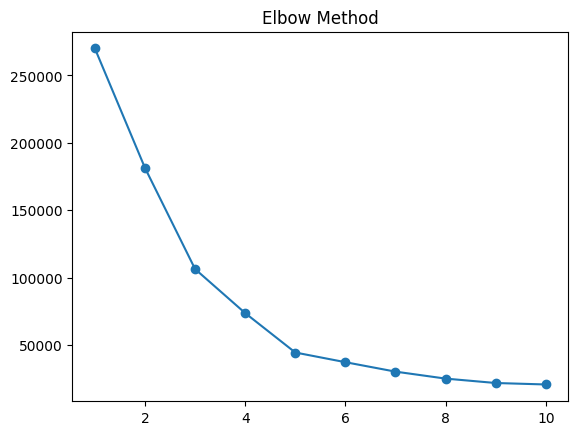

In [75]:
plt.plot(range(1,11),wcss , marker = 'o')
plt.title('Elbow Method')
plt.show()

In [76]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++',max_iter = 300 , n_init = 10 , random_state = 0)
y_means = kmeans.fit_predict(x)

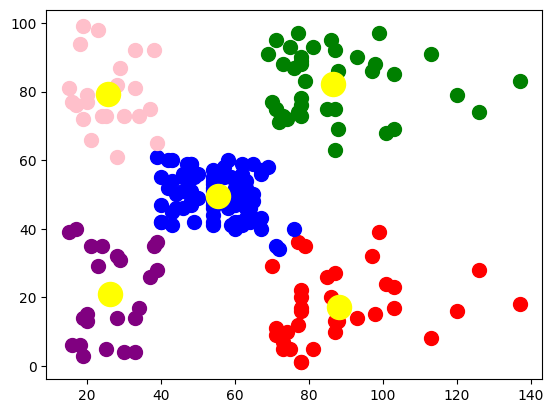

In [77]:
plt.scatter(x[y_means == 0,0] , x[y_means == 0,1], s =100 , c = 'red' , label = 'careful')
plt.scatter(x[y_means == 1,0] , x[y_means == 1,1], s =100 , c = 'blue' , label = 'no')
plt.scatter(x[y_means == 2,0] , x[y_means == 2,1], s =100 , c = 'green' , label = 'careful')
plt.scatter(x[y_means == 3,0] , x[y_means == 3,1], s =100 , c = 'pink' , label = 'careful')
plt.scatter(x[y_means == 4,0] , x[y_means == 4,1], s =100 , c = 'purple' , label = 'careful')
plt.scatter(x[y_means == 5,0] , x[y_means == 5,1], s =100 , c = 'red' , label = 'careful')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300 , c = 'yellow', label = 'Centroids')
plt.show()